###### Libraries

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s "/content/drive/My Drive/Final_Project" "/content/Final_Project"

In [ ]:
filepath = "/content/Final_Project/"
dataset = "/content/Final_Project/DataSet/"

Loading datasets

In [ ]:
all_df = pd.read_csv(dataset + 'allData.tsv', sep = '\t')

movies_df = pd.read_csv(dataset + 'movies.tsv', sep = '\t')

ratings_df = pd.read_csv(dataset + 'ratings.csv')

users_df = pd.read_csv(dataset + 'users.csv')

In [ ]:
all_df.head()

,userID,age,gender,movieID,name,year,genre1,genre2,genre3,rating
0,747,1,F,1193,One Flew Over the Cuckoo's Nest,1975,Drama,NaN,NaN,5
1,747,1,F,661,James and the Giant Peach,1996,Animation,Children's,Musical,3
2,747,1,F,2804,"Christmas Story, A",1983,Comedy,Drama,NaN,5
3,747,1,F,919,"Wizard of Oz, The",1939,Adventure,Children's,Drama,4
4,747,1,F,2791,Airplane!,1980,Comedy,NaN,NaN,4


In [ ]:
all_df.corr()

,userID,age,movieID,year,rating
userID,1.000000,-0.051571,-0.013507,0.027126,0.020385
age,-0.051571,1.000000,0.006374,-0.165808,0.053442
movieID,-0.013507,0.006374,1.000000,0.017141,-0.083447
year,0.027126,-0.165808,0.017141,1.000000,-0.168225
rating,0.020385,0.053442,-0.083447,-0.168225,1.000000


In [ ]:
all_df.describe()

,userID,age,movieID,year,rating
count,31620.000000,31620.000000,31620.000000,31620.000000,31620.000000
mean,2971.801834,29.232543,1899.408539,1985.426850,3.575142
std,1712.423189,11.842979,1060.151704,15.399585,1.116827
min,4.000000,1.000000,1.000000,1926.000000,1.000000
25%,1399.000000,25.000000,1097.000000,1980.000000,3.000000
50%,2998.000000,25.000000,2011.000000,1990.000000,4.000000
75%,4394.000000,35.000000,2772.000000,1997.000000,4.000000
max,6038.000000,56.000000,3952.000000,2000.000000,5.000000


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31620 entries, 0 to 31619
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userID   31620 non-null  int64 
 1   age      31620 non-null  int64 
 2   gender   31620 non-null  object
 3   movieID  31620 non-null  int64 
 4   name     31620 non-null  object
 5   year     31620 non-null  int64 
 6   genre1   31620 non-null  object
 7   genre2   23214 non-null  object
 8   genre3   10651 non-null  object
 9   rating   31620 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.4+ MB


In [ ]:
movies_df.head()

,movieID,name,year,genre1,genre2,genre3
0,1,Toy Story,1995,Animation,Children's,Comedy
1,2,Jumanji,1995,Adventure,Children's,Fantasy
2,3,Grumpier Old Men,1995,Comedy,Romance,NaN
3,4,Waiting to Exhale,1995,Comedy,Drama,NaN
4,5,Father of the Bride Part II,1995,Comedy,NaN,NaN


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieID  1465 non-null   int64 
 1   name     1465 non-null   object
 2   year     1465 non-null   int64 
 3   genre1   1465 non-null   object
 4   genre2   871 non-null    object
 5   genre3   299 non-null    object
dtypes: int64(2), object(4)
memory usage: 68.8+ KB


In [ ]:
movies_df.describe()

,movieID,year
count,1465.000000,1465.000000
mean,1994.323549,1987.225256
std,1093.672493,15.487384
min,1.000000,1926.000000
25%,1132.000000,1984.000000
50%,2061.000000,1994.000000
75%,2996.000000,1997.000000
max,3952.000000,2000.000000


In [ ]:
users_df.head()

,userID,age,gender
0,4,25,M
1,5,56,M
2,6,50,M
3,15,45,M
4,17,25,F


In [ ]:
users_df.describe()

,userID,age
count,2353.000000,2353.000000
mean,3020.239694,30.643434
std,1730.975299,13.125082
min,4.000000,1.000000
25%,1512.000000,25.000000
50%,2992.000000,25.000000
75%,4498.000000,35.000000
max,6038.000000,56.000000


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userID  2353 non-null   int64 
 1   age     2353 non-null   int64 
 2   gender  2353 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


No null values

In [ ]:
ratings_df.head()

,userID,movieID,rating
0,747,1193,5
1,747,661,3
2,747,2804,5
3,747,919,4
4,747,2791,4


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31620 entries, 0 to 31619
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userID   31620 non-null  int64
 1   movieID  31620 non-null  int64
 2   rating   31620 non-null  int64
dtypes: int64(3)
memory usage: 741.2 KB


In [ ]:
data = pd.get_dummies(ratings_df.movieID).set_index(ratings_df.userID).reset_index(drop = False)
data

,userID,1,2,3,4,5,6,7,8,9,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31615,4362,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31616,4362,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31617,4362,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31618,4362,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for x in ratings_df.values:
  data.loc[(data.userID == x[0]), x[1]] = x[2]
data

,userID,1,2,3,4,5,6,7,8,9,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31615,4362,4,0,1,2,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
31616,4362,4,0,1,2,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
31617,4362,4,0,1,2,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
31618,4362,4,0,1,2,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = data.groupby(by = ['userID']).mean()
data

,1,2,3,4,5,6,7,8,9,12,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data[data[data.columns[0]] != 0]

,1,2,3,4,5,6,7,8,9,12,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,
49,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0
52,4.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,5.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,5.0,0.0,4.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,3.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5812,4.0,4.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5868,3.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0


In [ ]:
np.array(data[data.index == 4].T)[data[data.index == 4].T > 0]

array([3., 4., 3., 2., 3., 2., 4., 1., 3., 1., 4., 4., 4., 4., 3.])

In [ ]:
data_env = data.T.reset_index(drop = False).reset_index(drop = True)

In [ ]:
data_env.columns = ['movieID'] + list(data_env.columns[1:])
data_env.columns

Index(['movieID',         4,         5,         6,        15,        17,
              18,        19,        22,        23,
       ...
            6008,      6009,      6021,      6022,      6024,      6025,
            6027,      6029,      6030,      6038],
      dtype='object', length=2354)

In [ ]:
data_env

,movieID,4,5,6,15,17,18,19,22,23,...,6008,6009,6021,6022,6024,6025,6027,6029,6030,6038
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1461,3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1462,3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1463,3951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_env.to_csv(dataset + 'user_movie_matrix.csv')

In [ ]:
ratings_df.head()

,userID,movieID,rating
0,747,1193,5
1,747,661,3
2,747,2804,5
3,747,919,4
4,747,2791,4


In [ ]:
movie_freq = {}
movie_rating = {}

for x in ratings_df[['movieID','rating']].values:
  if x[0] in movie_freq:
    movie_freq[x[0]] += 1
    movie_rating[x[0]] += x[1] 
  else:
    movie_freq[x[0]] = 1
    movie_rating[x[0]] = x[1]

# movie_freq
# movie_rating

In [ ]:
select_movie = pd.merge(pd.DataFrame(movie_freq.values(), index = movie_freq.keys(), columns = ['Freq']), 
                        pd.DataFrame(movie_rating.values(), index = movie_freq.keys(), columns = ['Rating']), left_index = True, right_index = True)
select_movie['Rating'] /= select_movie.Freq
select_movie = select_movie.sort_values(by = ['Rating', 'Freq'], ascending = False)
print(f'Min Frequency {np.sqrt(len(users_df))}')
select_movie = select_movie.loc[select_movie.Freq > np.sqrt(len(users_df))]
select_movie

Min Frequency 48.507731342539614


,Freq,Rating
260,212,4.509434
720,108,4.490741
953,132,4.431818
1193,162,4.425926
908,153,4.392157
...,...,...
3689,98,2.061224
2422,118,1.957627
3238,96,1.916667
1707,101,1.891089


In [ ]:
select_movie.to_csv(dataset + 'selected_movies.csv')

In [ ]:
select_movie.index.min()

1

In [ ]:
selected_matrix = data_env.loc[[x in select_movie.index for x in data_env.movieID]]
selected_matrix.head()

,movieID,4,5,6,15,17,18,19,22,23,...,6008,6009,6021,6022,6024,6025,6027,6029,6030,6038
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,45,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_users = list(set(ratings_df.loc[[x in selected_matrix.movieID for x in ratings_df.movieID]].userID))
selected_users[:10]

[5, 4102, 4105, 15, 2074, 2077, 33, 4130, 2083, 37]

In [ ]:
selected_matrix = selected_matrix.loc[:,['movieID'] + selected_users]
selected_matrix

,movieID,5,4102,4105,15,2074,2077,33,4130,2083,...,4060,2014,2017,4076,4077,4083,2039,2040,4091,2047
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,5.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,...,4.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12,21,0.0,4.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0
21,45,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,3702,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,...,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1393,3763,0.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1400,3793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1407,3807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_matrix = selected_matrix.set_index('movieID').T
selected_matrix

movieID,1,2,6,21,45,47,60,86,111,145,...,3578,3654,3686,3689,3698,3702,3763,3793,3807,3863
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4102,0.0,0.0,5.0,4.0,0.0,5.0,2.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0
4105,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,5.0,0.0,4.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,5.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4091,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
selected_matrix.sum(axis = 0).sort_values(ascending = False)


movieID
1196    868.0
260     849.0
593     836.0
589     806.0
2571    774.0
        ...  
2907     77.0
3689     71.0
3130     67.0
2624     61.0
2525     61.0
Length: 197, dtype: float64

In [ ]:
[str(x) for x in selected_matrix.sum(axis = 0).sort_values(ascending = False).index]

['1196',
 '260',
 '593',
 '589',
 '2571',
 '919',
 '1270',
 '1193',
 '1617',
 '1097',
 '480',
 '2396',
 '2797',
 '2804',
 '1923',
 '2791',
 '1784',
 '2997',
 '1127',
 '21',
 '1222',
 '2268',
 '1393',
 '2406',
 '3578',
 '1090',
 '47',
 '733',
 '908',
 '349',
 '588',
 '111',
 '1294',
 '1234',
 '1219',
 '3793',
 '3253',
 '3552',
 '2080',
 '6',
 '2407',
 '3039',
 '1',
 '1380',
 '597',
 '969',
 '2011',
 '235',
 '1777',
 '2683',
 '1947',
 '953',
 '2706',
 '3386',
 '539',
 '587',
 '3424',
 '2087',
 '3702',
 '1544',
 '1228',
 '2278',
 '2105',
 '661',
 '2329',
 '1081',
 '1032',
 '2005',
 '2455',
 '2058',
 '1099',
 '2313',
 '2948',
 '1129',
 '353',
 '2096',
 '2710',
 '1449',
 '1259',
 '2949',
 '1952',
 '1249',
 '2245',
 '3698',
 '3252',
 '2366',
 '3763',
 '1805',
 '1256',
 '2539',
 '3555',
 '1244',
 '1265',
 '2527',
 '788',
 '1357',
 '351',
 '590',
 '2413',
 '3510',
 '2186',
 '592',
 '3654',
 '372',
 '2863',
 '45',
 '3686',
 '2926',
 '3264',
 '720',
 '2987',
 '3159',
 '2013',
 '2378',
 '2496',
 

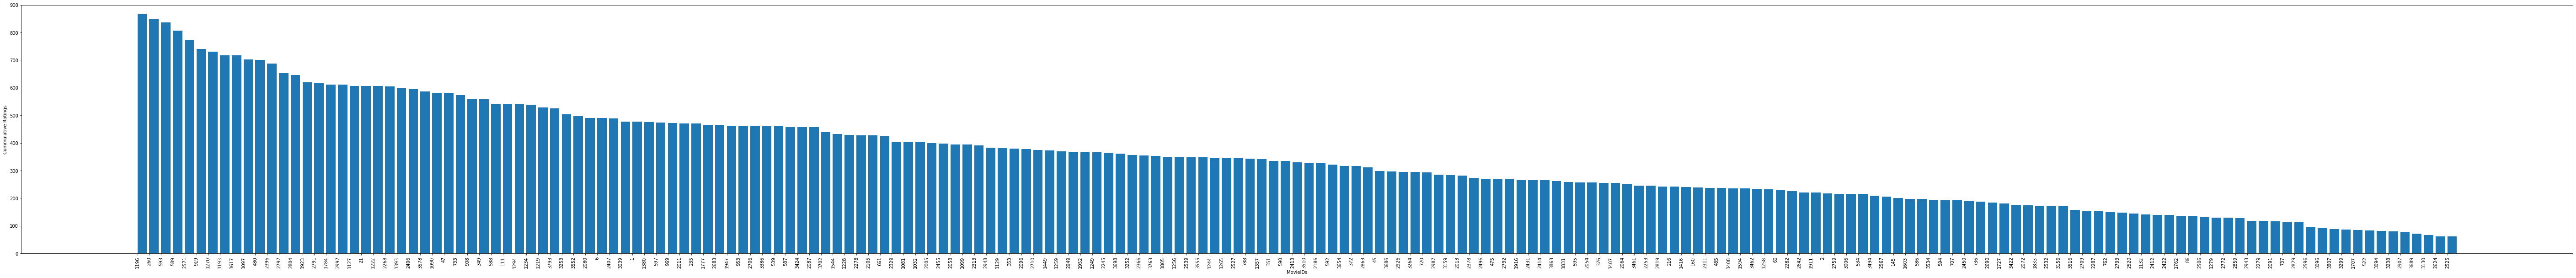

In [ ]:
plt.figure(figsize = [100,10])
plt.bar([str(x) for x in selected_matrix.sum(axis = 0).sort_values(ascending = False).index], selected_matrix.sum(axis = 0).sort_values(ascending = False), align="edge")
plt.xticks(rotation='vertical')
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labelsplt.title("Cummulative ratings vs MovieID")
plt.xlabel("MovieIDs")
plt.ylabel("Cummulative Ratings")
plt.ylim(ymin=0, ymax=900)
plt.savefig('graph.png')
plt.show()


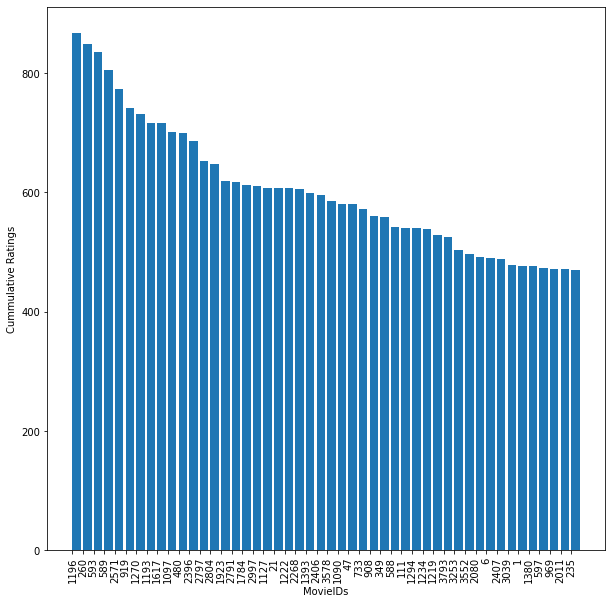

In [ ]:
lower_q = selected_matrix.sum(axis = 0).sort_values(ascending = False).describe()['25%']
upper_q = selected_matrix.sum(axis = 0).sort_values(ascending = False).describe()['75%']
median = selected_matrix.sum(axis = 0).sort_values(ascending = False).describe()['50%']

plot_m = selected_matrix.sum(axis = 0).sort_values(ascending = False)[selected_matrix.sum(axis = 0).sort_values(ascending = False) > upper_q].copy()

plt.figure(figsize = [10,10])
plt.bar(plot_m.index.astype('str'), plot_m.values, align="edge")
plt.xticks(rotation='vertical')
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labelsplt.title("Cummulative ratings vs MovieID")
plt.xlabel("MovieIDs")
plt.ylabel("Cummulative Ratings")
#plt.ylim(ymin=0, ymax=900)
plt.savefig('graph.png')
plt.show()



In [ ]:
#y is movie ratings 0-10, x is movies, annotate with the user ids
userCount = {}
for x in selected_matrix:
  for i in selected_matrix[x]:
    if i > 0:
      if x in userCount:
        userCount[x] += 1
      else: 
        userCount[x] = 1


top = selected_matrix.sum(axis = 0).sort_values(ascending = False).index[:15]
print(list(enumerate(selected_matrix.sum(axis=0))))
print(userCount)
print(top)
plt.figure(figsize=[100,10])
plt.plot

[(0, 477.0), (1, 217.0), (2, 490.0), (3, 607.0), (4, 298.0), (5, 581.0), (6, 230.0), (7, 136.0), (8, 541.0), (9, 200.0), (10, 239.0), (11, 242.0), (12, 470.0), (13, 849.0), (14, 559.0), (15, 335.0), (16, 379.0), (17, 316.0), (18, 255.0), (19, 270.0), (20, 700.0), (21, 237.0), (22, 84.0), (23, 215.0), (24, 461.0), (25, 197.0), (26, 458.0), (27, 542.0), (28, 806.0), (29, 335.0), (30, 322.0), (31, 836.0), (32, 193.0), (33, 257.0), (34, 474.0), (35, 424.0), (36, 193.0), (37, 293.0), (38, 573.0), (39, 188.0), (40, 114.0), (41, 149.0), (42, 344.0), (43, 560.0), (44, 741.0), (45, 463.0), (46, 472.0), (47, 404.0), (48, 405.0), (49, 581.0), (50, 702.0), (51, 394.0), (52, 607.0), (53, 382.0), (54, 142.0), (55, 717.0), (56, 868.0), (57, 528.0), (58, 607.0), (59, 429.0), (60, 538.0), (61, 347.0), (62, 367.0), (63, 350.0), (64, 232.0), (65, 370.0), (66, 346.0), (67, 731.0), (68, 130.0), (69, 541.0), (70, 341.0), (71, 476.0), (72, 599.0), (73, 255.0), (74, 236.0), (75, 240.0), (76, 373.0), (77, 433.

<function matplotlib.pyplot.plot>

<Figure size 7200x720 with 0 Axes>

In [ ]:
class SGD:
  
  def __init__(self, n_epochs=500, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs                                     #Number of times to train through the entire dataset
    self.n_latent_features = n_latent_features                   #Number of hidden features we are using for training
    self.lmbda = lmbda                                           #
    self.learning_rate = learning_rate                           #The size of step taken when doing gradient descent
  
  def predictions(self, P, Q):
    return np.dot(P.T, Q)
  
  def fit(self, X_train, X_val):
    m, n = X_train.shape

    self.P = 3 * np.random.rand(self.n_latent_features, m)
    self.Q = 3 * np.random.rand(self.n_latent_features, n)
    
    self.train_error = []
    self.val_error = []
    self.train_accuracy = []
    self.val_accuracy = []

    users, items = X_train.nonzero()
    
    for epoch in range(self.n_epochs):
        for u, i in zip(users, items):
            error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
            self.P[:, u] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[:, u])
            self.Q[:, i] += self.learning_rate * (error * self.P[:, u] - self.lmbda * self.Q[:, i])

        train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
        #train_acc = accuracy(self.predictions(self.P, self.Q), X_train)
        val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
        #val_acc = accuracy(self.predictions(self.P, self.Q), X_val)
        self.train_error.append(train_rmse)
        self.val_error.append(val_rmse)
        #self.train_accuracy.append(train_acc)
        #self.val_accuracy.append(val_acc)
        
    return self
  
  def predict(self, X_train, user_index):
    y_hat = self.predictions(self.P, self.Q)
    predictions_index = np.where(X_train[user_index, :] == 0)[0]
    return y_hat[user_index, predictions_index].flatten()

In [ ]:
ratings = ratings_df.pivot(index = 'userID', columns = 'movieID', values = 'rating')
ratings

movieID,1,2,3,4,5,6,7,8,9,12,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings = ratings_df.pivot(index = 'userID', columns = 'movieID', values = 'rating').fillna(0).values
ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('{:.2f}%'.format(sparsity))

0.92%


In [ ]:
MIN_USER_RATINGS = 25
DELETE_RATING_COUNT = 15

def train_test_split_custom(ratings):

    validation = np.zeros(ratings.shape)
    train = ratings.copy()

    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(
              ratings[user, :].nonzero()[0],
              size=DELETE_RATING_COUNT,
              replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [ ]:
train, val = train_test_split_custom(ratings)

In [ ]:
len(val), len(train)

(2353, 2353)

In [ ]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(prediction, ground_truth))

def accuracy(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return accuracy_score(prediction, ground_truth)

In [ ]:
model = SGD().fit(train, val)

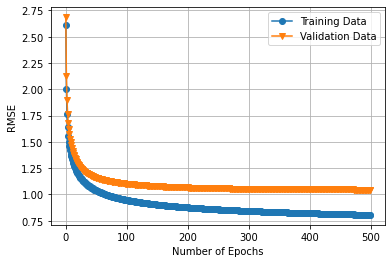

In [ ]:
plt.plot(range(model.n_epochs), model.train_error, marker='o', label='Training Data');
plt.plot(range(model.n_epochs), model.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
ratings = ratings_df.pivot(index = 'userID', columns = 'movieID', values = 'rating').fillna(0)
predict = pd.DataFrame(columns = ratings.reset_index(drop = True).columns.to_list(), index = ratings.sort_index().index)

for x in predict.index[:]:
  user_index = ratings.index.get_loc(x)
  predictions_index = np.where(train[user_index, :] == 0)[0]
  p = model.predict(train, user_index)
  r = []
  for y in ratings.loc[x]:
    if y == 0:
      r.append(p[0])
      p = p[1:]
    else:
      r.append(y)
  predict.loc[x] = r

predict.to_csv(dataset + 'final_result_all.csv')

In [ ]:
predict_df = pd.read_csv(dataset + 'predict.csv')
predict_df.head()

,userID,movieID,rating
0,3073,2997,0
1,2083,788,0
2,5949,3386,0
3,4227,2683,0
4,3876,3763,0


In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = model.predict(train, user_index)

In [ ]:
max([np.floor(x) for x in rating_predictions])

9.0

In [ ]:
# existing_ratings_index = np.where(train[user_index, :] > 0)[0]
# existing_ratings = train[user_index, existing_ratings_index]

# create_artist_ratings(
#   movies_df,
#   existing_ratings_index,
#   existing_ratings
# )

In [ ]:
train, val = train_test_split_custom(selected_matrix.values)
model = SGD().fit(train, val)

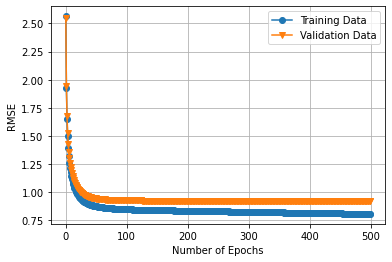

In [ ]:
plt.plot(range(model.n_epochs), model.train_error, marker='o', label='Training Data');
plt.plot(range(model.n_epochs), model.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
user_index = selected_matrix.index.get_loc(3073)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = model.predict(train, user_index)

In [ ]:
selected_matrix.min()

movieID
1       0.0
2       0.0
6       0.0
21      0.0
45      0.0
       ... 
3702    0.0
3763    0.0
3793    0.0
3807    0.0
3863    0.0
Length: 197, dtype: float64

In [ ]:
# def create_movie_ratings(ratings_df, ratings, movie_df, index, ratings, n=10):
#   movie_ids = ratings_df.columns[index]
#   artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
#   top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
#   artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
#   artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
#   return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
predict = pd.DataFrame(columns = selected_matrix.reset_index(drop = True).columns.to_list(), index = selected_matrix.sort_index().index)

In [ ]:
selected_matrix.loc[5]

movieID
1       0.0
2       0.0
6       0.0
21      0.0
45      0.0
       ... 
3702    0.0
3763    0.0
3793    0.0
3807    0.0
3863    0.0
Name: 5, Length: 197, dtype: float64

In [ ]:
for x in predict.index[:]:
  user_index = selected_matrix.index.get_loc(x)
  predictions_index = np.where(train[user_index, :] == 0)[0]
  p = model.predict(train, user_index)
  r = []
  for y in selected_matrix.loc[x]:
    if y == 0:
      r.append(p[0])
      p = p[1:]
    else:
      r.append(y)
  predict.loc[x] = r

In [ ]:
predict.iloc[1].max()

5.0

In [ ]:
ratings.nonzero()

AttributeError: ignored

In [ ]:
predict.iloc[0].describe()

In [ ]:
predict.max(axis = 0).sort_values()

In [ ]:
#ratings.describe()

### Ratings

In [ ]:
training_set = pd.read_csv(dataset + 'training_set.csv', index_col=0)
training_set

In [ ]:
training_set = pd.read_csv(dataset + 'training_set.csv', index_col=0)
training_set = training_set.replace(np.nan, 0)
training_set

In [ ]:
train, val = train_test_split_custom(training_set.values)
model = SGD().fit(train, val)

In [ ]:
plt.plot(range(model.n_epochs), model.train_error, marker='o', label='Training Data');
plt.plot(range(model.n_epochs), model.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
predict = pd.DataFrame(columns = training_set.reset_index(drop = True).columns.to_list(), index = training_set.sort_index().index)

for x in predict.index[:]:
  user_index = training_set.index.get_loc(x)
  predictions_index = np.where(train[user_index, :] == 0)[0]
  p = model.predict(train, user_index)
  r = []
  for y in training_set.loc[x]:
    if y == 0:
      r.append(p[0])
      p = p[1:]
    else:
      r.append(y)
  predict.loc[x] = r

In [ ]:
predict.to_csv(dataset + 'final_resultsgd.csv')
results = pd.read_csv(dataset + 'final_resultsgd.csv', index_col = 0)
results

print(results.loc[4, '3763'])

print(results.loc[5, '1380'])

print(results.loc[6, '1234'])

print(results.loc[15, '260'])

print(results.loc[18, '1544'])

print(results.loc[22, '3763'])

print(results.loc[33, '2396'])

print(results.loc[37, '480'])

print(results.loc[49, '1097'])

print(results.loc[52, '589'])

if final matrix can get in pandas df form, can use the following code to extract 10 points(with correct matrix name instead of svd_matrix)

#svd matrix values for the 10 removed: 

type(svd_matrix)

print(svd_matrix.iloc[4][3763])

print(svd_matrix.iloc[5][1380])

print(svd_matrix.iloc[6][1234])

print(svd_matrix.iloc[15][260])

print(svd_matrix.iloc[18][1544])

print(svd_matrix.iloc[22][3763])

print(svd_matrix.iloc[33][2396])

print(svd_matrix.iloc[37][480])

print(svd_matrix.iloc[49][1097])

print(svd_matrix.iloc[52][589])

In [ ]:
results = pd.read_csv(dataset + 'final_result.csv', index_col = 0)
results

In [ ]:
type(results)

print(results.loc[4, '3763'])

print(results.loc[5, '1380'])

print(results.loc[6, '1234'])

print(results.loc[15, '260'])

print(results.loc[18, '1544'])

print(results.loc[22, '3763'])

print(results.loc[33, '2396'])

print(results.loc[37, '480'])

print(results.loc[49, '1097'])

print(results.loc[52, '589'])

In [ ]:
results.loc[[4, 5, 6, 15, 18, 22, 33, 37, 49, 52], ['3763', '1380', '1234', '1544']]

In [ ]:
results = pd.read_csv(dataset + 'final_result_all.csv', index_col = 0)
results

In [ ]:
type(results)

print(results.loc[4, '3763'])

print(results.loc[5, '1380'])

print(results.loc[6, '1234'])

print(results.loc[15, '260'])

print(results.loc[18, '1544'])

print(results.loc[22, '3763'])

print(results.loc[33, '2396'])

print(results.loc[37, '480'])

print(results.loc[49, '1097'])

print(results.loc[52, '589'])

In [ ]:
results.loc[results['1'] > 5]

In [ ]:
ratings.loc[19,:]

In [ ]:
results.loc[results['1'] > 5].loc[19]

In [ ]:
sparsity = float(len(training_set.values.nonzero()[0]))
sparsity /= (training_set.values.shape[0] * training_set.values.shape[1])
sparsity *= 100
print('{:.2f}%'.format(100 - sparsity))

In [ ]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('{:.2f}%'.format(100-sparsity))

In [ ]:
predict_df

In [ ]:
len(training_set.columns), train.shape

In [ ]:
for x in predict_df[predict_df.movieID.isin(training_set.columns.astype('int'))].values:  
  user_index = training_set.index.get_loc(x[0])
  #predictions_index = np.where(train[user_index, :] == 0)[0]
  p = model.predict(train, user_index)
  #print(p)
  #print(training_set.columns.get_loc(str(x[1])))
  #print(len(p))
  index = training_set.columns.get_loc(str(int(x[1])))
  if index >= len(p):
    pass
  else:
    #print(p[index])
    predict_df.loc[(predict_df.userID == x[0]) & (predict_df.movieID == x[1]), 'rating'] = p[index]
predict_df[predict_df.rating != 0].to_csv(dataset + 'predicted_sgd.csv')
  # r = []
  # for y in ratings.loc[x]:
  #   if y == 0:
  #     r.append(p[0])
  #     p = p[1:]
  #   else:
  #     r.append(y)
  # predict.loc[x] = r

  #print(user_index,x[0])